In [2]:
"""
============================================================
Optimizers and Initialization in Deep Learning
============================================================

This script demonstrates:
1. Various Gradient Descent Optimizers
   - SGD
   - SGD with Momentum
   - Nesterov Accelerated Gradient (NAG)
   - Adagrad
   - RMSProp
   - Adam
   - (optional) AdamW, Nadam

2. Neuron Initialization Schemes
   - Random / Zero / Normal
   - Xavier (Glorot)
   - He
   - LeCun

"""

'\n============================================================\nOptimizers and Initialization in Deep Learning\n============================================================\n\nThis script demonstrates:\n1. Various Gradient Descent Optimizers\n   - SGD\n   - SGD with Momentum\n   - Nesterov Accelerated Gradient (NAG)\n   - Adagrad\n   - RMSProp\n   - Adam\n   - (optional) AdamW, Nadam\n\n2. Neuron Initialization Schemes\n   - Random / Zero / Normal\n   - Xavier (Glorot)\n   - He\n   - LeCun\n\n'

In [3]:
# =======================
# Imports
# =======================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# For reproducibility
np.random.seed(42)

In [4]:
# =======================
# 1. Define the Function to Optimize
# =======================
def func(x, y):
    return 0.5 * x**2 + 5 * y**2

def grad(x, y):
    return np.array([x, 10 * y])

In [5]:
# =======================
# 2. Optimizer Implementations
# =======================

In [6]:
class SGD:
    def __init__(self, lr=0.05):
        self.lr = lr

    def step(self, params, grads):
        return params - self.lr * grads

In [7]:
class SGDMomentum:
    def __init__(self, lr=0.05, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = np.zeros_like(grads := np.zeros(2))

    def step(self, params, grads):
        self.v = self.momentum * self.v - self.lr * grads
        return params + self.v

In [8]:
class NAG:
    def __init__(self, lr=0.1, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = np.zeros(2)

    def step(self, params, grads_fn):
        look_ahead = params + self.momentum * self.v
        grads = grads_fn(*look_ahead)
        self.v = self.momentum * self.v - self.lr * grads
        return params + self.v


In [9]:
class Adagrad:
    def __init__(self, lr=0.3, eps=1e-8):
        self.lr = lr
        self.eps = eps
        self.cache = np.zeros(2)

    def step(self, params, grads):
        self.cache += grads ** 2
        return params - self.lr * grads / (np.sqrt(self.cache) + self.eps)

In [10]:
class RMSProp:
    def __init__(self, lr=0.05, beta=0.9, eps=1e-8):
        self.lr = lr
        self.beta = beta
        self.eps = eps
        self.cache = np.zeros(2)

    def step(self, params, grads):
        self.cache = self.beta * self.cache + (1 - self.beta) * grads ** 2
        return params - self.lr * grads / (np.sqrt(self.cache) + self.eps)

In [11]:
class Adam:
    def __init__(self, lr=0.05, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.m = np.zeros(2)
        self.v = np.zeros(2)
        self.t = 0

    def step(self, params, grads):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grads
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grads ** 2)

        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        return params - self.lr * m_hat / (np.sqrt(v_hat) + self.eps)

In [12]:
def optimize(optimizer, name, steps=50, start=np.array([2.0, 2.0])):
    params = start.copy()
    trajectory = [params.copy()]
    for i in range(steps):
        if isinstance(optimizer, NAG):
            params = optimizer.step(params, grad)
        else:
            g = grad(*params)
            params = optimizer.step(params, g)
        trajectory.append(params.copy())
    trajectory = np.array(trajectory)

    # Plot
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    plt.figure(figsize=(5, 4))
    plt.contour(X, Y, Z, levels=30, cmap=cm.viridis)
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'r.-', label='Path')
    plt.title(f"{name} Optimization Path")
    plt.xlabel('x'); plt.ylabel('y')
    plt.legend()
    plt.show()

Visualizing different optimizers on an anisotropic function...



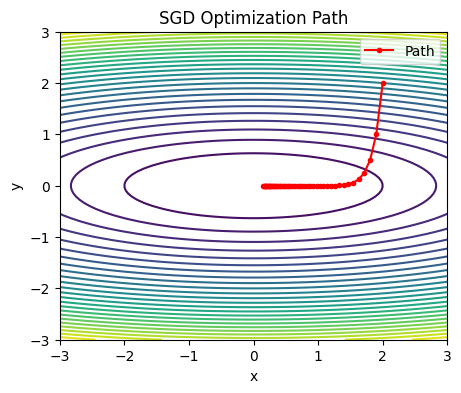

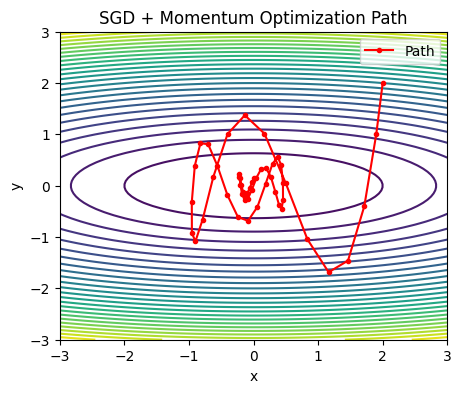

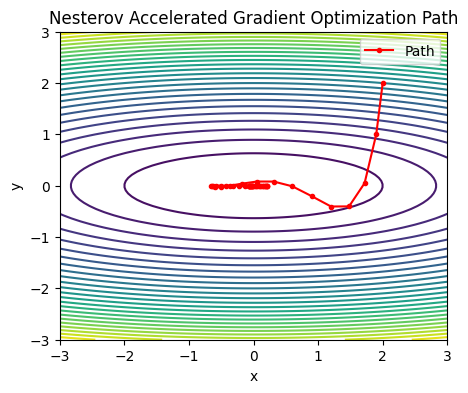

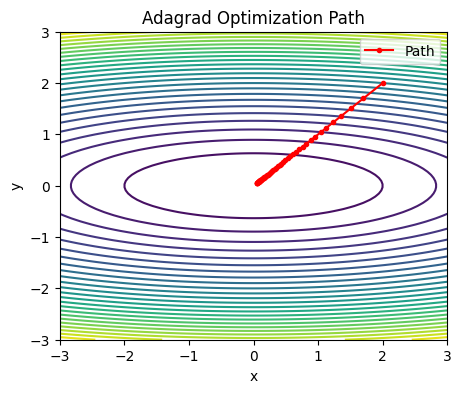

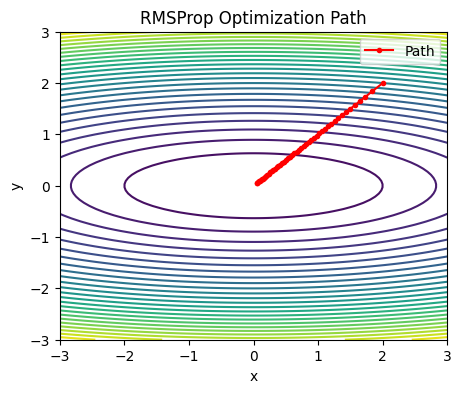

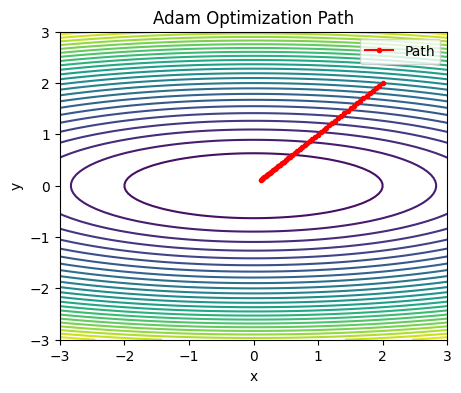

In [13]:
print("Visualizing different optimizers on an anisotropic function...\n")

optimize(SGD(lr=0.05), "SGD")
optimize(SGDMomentum(lr=0.05), "SGD + Momentum")
optimize(NAG(lr=0.05), "Nesterov Accelerated Gradient")
optimize(Adagrad(lr=0.3), "Adagrad")
optimize(RMSProp(lr=0.05), "RMSProp")
optimize(Adam(lr=0.05), "Adam")

In [14]:
def loss_plot(optimizer, name, steps=50, start=np.array([2.0, 2.0]), plot_path=True):
    """
    Runs optimization using the given optimizer.
    Returns the loss trajectory and optionally plots optimization path.
    """
    params = start.copy()
    trajectory = [params.copy()]
    losses = [func(*params)]

    for i in range(steps):
        if isinstance(optimizer, NAG):
            params = optimizer.step(params, grad)
        else:
            g = grad(*params)
            params = optimizer.step(params, g)

        trajectory.append(params.copy())
        losses.append(func(*params))

    trajectory = np.array(trajectory)

    # Plot optimization path (contour)
    if plot_path:
        x = np.linspace(-3, 3, 100)
        y = np.linspace(-3, 3, 100)
        X, Y = np.meshgrid(x, y)
        Z = func(X, Y)

        plt.figure(figsize=(5, 4))
        plt.contour(X, Y, Z, levels=30, cmap=cm.viridis)
        plt.plot(trajectory[:, 0], trajectory[:, 1], 'r.-', label='Path')
        plt.title(f"{name} Optimization Path")
        plt.xlabel('x'); plt.ylabel('y')
        plt.legend()
        plt.show()

    return np.array(losses)


Running SGD...
Running Momentum...
Running NAG...
Running Adagrad...
Running RMSProp...
Running Adam...


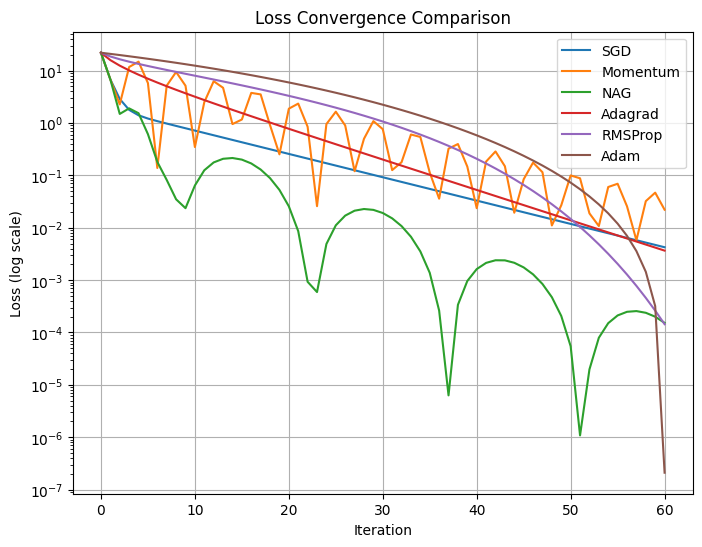

In [15]:
# Compare convergence rates
optimizers = {
    "SGD": SGD(lr=0.05),
    "Momentum": SGDMomentum(lr=0.05),
    "NAG": NAG(lr=0.05),
    "Adagrad": Adagrad(lr=0.3),
    "RMSProp": RMSProp(lr=0.05),
    "Adam": Adam(lr=0.05),
}

loss_histories = {}

# Disable contour plot for faster run when comparing
for name, opt in optimizers.items():
    print(f"Running {name}...")
    loss_histories[name] = loss_plot(opt, name, steps=60, plot_path=False)

# Plot loss convergence
plt.figure(figsize=(8, 6))
for name, losses in loss_histories.items():
    plt.plot(losses, label=name)
plt.yscale('log')
plt.title("Loss Convergence Comparison")
plt.xlabel("Iteration")
plt.ylabel("Loss (log scale)")
plt.legend()
plt.grid(True)
plt.show()


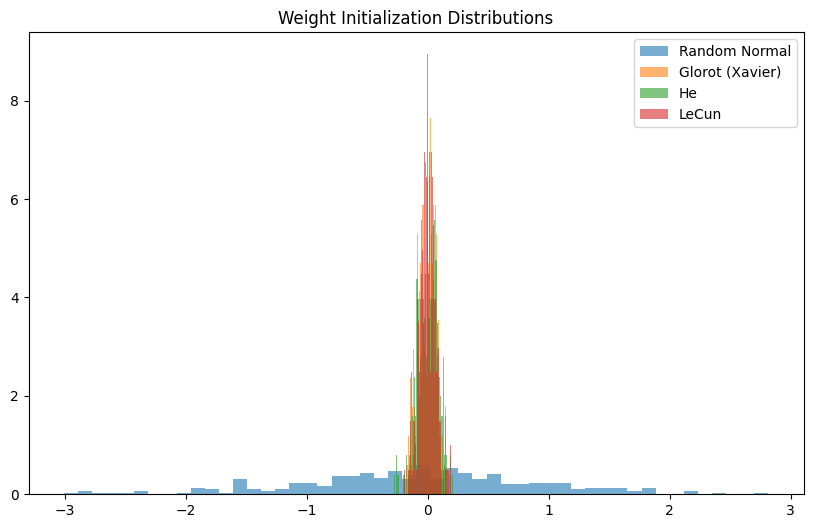

In [17]:
# =======================
# 5. Initialization Demonstration
# =======================
def visualize_initializations():
    n_neurons = 256
    fan_in = 256
    fan_out = 128

    # Different initialization schemes
    initializations = {
        "Random Normal": np.random.randn(n_neurons),
        "Glorot (Xavier)": np.random.randn(n_neurons) * np.sqrt(2.0 / (fan_in + fan_out)),
        "He": np.random.randn(n_neurons) * np.sqrt(2.0 / fan_in),
        "LeCun": np.random.randn(n_neurons) * np.sqrt(1.0 / fan_in)
    }

    plt.figure(figsize=(10, 6))
    for name, vals in initializations.items():
        plt.hist(vals, bins=50, alpha=0.6, label=name, density=True)
    plt.title("Weight Initialization Distributions")
    plt.legend()
    plt.show()


visualize_initializations()

In [23]:
# =======================
# 6. Student Exercises
# =======================
print("\n" + "="*60)
print("EXERCISES:")
print("="*60)
print("""
1️⃣  Modify the learning rate and momentum values for SGD, Momentum, and NAG.
    - Observe how convergence changes. What happens if learning rate is too high or too low?

2️⃣  Implement and visualize the AdamW optimizer:
    - Hint: It's similar to Adam, but adds weight decay.

3️⃣  For the initialization part:
    - Write a small neural network layer and test different initialization schemes.
    - Plot the output variance after 1 forward pass for each initialization type.
    - Which one maintains stable activations?

(Bonus)
4️⃣  Extend the visualization to other functions.
    - How do optimizers behave on those landscapes?
""")



EXERCISES:

1️⃣  Modify the learning rate and momentum values for SGD, Momentum, and NAG.
    - Observe how convergence changes. What happens if learning rate is too high or too low?

2️⃣  Implement and visualize the AdamW optimizer:
    - Hint: It's similar to Adam, but adds weight decay.

3️⃣  For the initialization part:
    - Write a small neural network layer and test different initialization schemes.
    - Plot the output variance after 1 forward pass for each initialization type.
    - Which one maintains stable activations?

(Bonus)
4️⃣  Extend the visualization to other functions.
    - How do optimizers behave on those landscapes?

